In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('historical_data.csv.csv')  # Replace 'your_data.csv' with the actual file path

# Use 'Close' prices for prediction
dataset = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)


In [16]:

# Prepare data for LSTM model
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)



In [17]:

look_back = 4  # You can experiment with different look_back values
X, y = create_dataset(dataset_scaled, look_back)

print("input")
print(X)
print("output")
print(y)

input
[[0.37284319 0.34617633 0.32284319 0.32941176]
 [0.34617633 0.32284319 0.32941176 0.31519608]
 [0.32284319 0.32941176 0.31519608 0.29362745]
 [0.32941176 0.31519608 0.29362745 0.28264711]
 [0.31519608 0.29362745 0.28264711 0.25882353]
 [0.29362745 0.28264711 0.25882353 0.21578417]
 [0.28264711 0.25882353 0.21578417 0.21490191]
 [0.25882353 0.21578417 0.21490191 0.21480378]
 [0.21578417 0.21490191 0.21480378 0.17882344]
 [0.21490191 0.21480378 0.17882344 0.17852927]
 [0.21480378 0.17882344 0.17852927 0.23666657]
 [0.17882344 0.17852927 0.23666657 0.23392143]
 [0.17852927 0.23666657 0.23392143 0.08852946]
 [0.23666657 0.23392143 0.08852946 0.09558824]
 [0.23392143 0.08852946 0.09558824 0.2241175 ]
 [0.08852946 0.09558824 0.2241175  0.23509809]
 [0.09558824 0.2241175  0.23509809 0.2495098 ]
 [0.2241175  0.23509809 0.2495098  0.28578431]
 [0.23509809 0.2495098  0.28578431 0.34725485]
 [0.2495098  0.28578431 0.34725485 0.35019603]
 [0.28578431 0.34725485 0.35019603 0.32431377]
 [0.347

In [18]:

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))




In [19]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)



Epoch 1/50
194/194 - 2s - loss: 0.0617 - 2s/epoch - 9ms/step
Epoch 2/50
194/194 - 0s - loss: 0.0052 - 252ms/epoch - 1ms/step
Epoch 3/50
194/194 - 0s - loss: 0.0033 - 284ms/epoch - 1ms/step
Epoch 4/50
194/194 - 0s - loss: 0.0030 - 266ms/epoch - 1ms/step
Epoch 5/50
194/194 - 0s - loss: 0.0030 - 266ms/epoch - 1ms/step
Epoch 6/50
194/194 - 0s - loss: 0.0029 - 268ms/epoch - 1ms/step
Epoch 7/50
194/194 - 0s - loss: 0.0028 - 246ms/epoch - 1ms/step
Epoch 8/50
194/194 - 0s - loss: 0.0027 - 247ms/epoch - 1ms/step
Epoch 9/50
194/194 - 0s - loss: 0.0027 - 294ms/epoch - 2ms/step
Epoch 10/50
194/194 - 0s - loss: 0.0025 - 293ms/epoch - 2ms/step
Epoch 11/50
194/194 - 0s - loss: 0.0024 - 271ms/epoch - 1ms/step
Epoch 12/50
194/194 - 0s - loss: 0.0027 - 241ms/epoch - 1ms/step
Epoch 13/50
194/194 - 0s - loss: 0.0025 - 231ms/epoch - 1ms/step
Epoch 14/50
194/194 - 0s - loss: 0.0023 - 293ms/epoch - 2ms/step
Epoch 15/50
194/194 - 0s - loss: 0.0023 - 277ms/epoch - 1ms/step
Epoch 16/50
194/194 - 0s - loss: 0.00

In [20]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(1, -1))  # Reshape y_train for inverse_transform

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(1, -1))  # Reshape y_test for inverse_transform




In [21]:
# Visualize the results
train_plot = np.empty_like(dataset)
train_plot[:, :] = np.nan
train_plot[look_back:len(train_predict) + look_back, :] = train_predict



In [22]:
test_plot = np.empty_like(dataset)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (look_back * 2) + 1:len(dataset) - 1, :] = test_predict



ValueError: could not broadcast input array from shape (49,1) into shape (43,1)

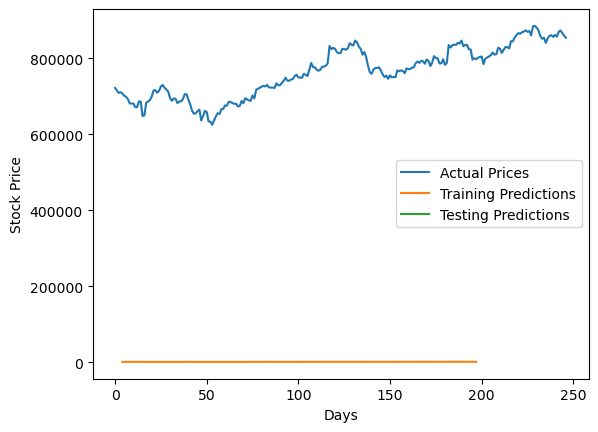

In [23]:
plt.plot(scaler.inverse_transform(dataset), label='Actual Prices')
plt.plot(train_plot, label='Training Predictions')
plt.plot(test_plot, label='Testing Predictions')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [24]:
# ... (previous code)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(1, -1))

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(1, -1))

# Visualize the results
train_plot = np.empty_like(dataset)
train_plot[:, :] = np.nan
train_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_plot = np.empty_like(dataset)
test_plot[:, :] = np.nan
# Adjust the indexing to match the length of test_predict
test_plot[len(train_predict) + (look_back * 2):len(dataset) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(dataset), label='Actual Prices')
plt.plot(train_plot, label='Training Predictions')
plt.plot(test_plot, label='Testing Predictions')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


ValueError: could not broadcast input array from shape (49,1) into shape (44,1)